In [ ]:
# Trilha 05 - Análise de regressão multivariada

# Gabriel Medeiros do Nascimento TurmaQ Big Data

a)    Ajustar um modelo de regressão linear sendo price a variável alvo (resposta), como função das demais variáveis citadas acima: horsepower, length, engine.size, city.mpg.

b)    Realizar a análise do modelo ajustado, avaliando o valor do R-quadrado, a significância estatística de cada parâmetro ajustado e a qualidade total do ajuste pela estatística F.

c)    Realizar a verificação de aderência do modelo às premissas estatísticas do método dos mínimos quadrados através dos gráficos diagnósticos, comentando o gráfico dos resíduos x valores ajustados e o gráfico da curva Normal-QQ.

d)    Fazer uma análise dos resultados do ajuste, discorrendo sobre o impacto de cada preditora, significativa do ponto de vista estatístico, no preço do carro.

In [ ]:
autos = read.csv(file='/content/autos.csv', sep=';')
head(autos)

,make,fuel.type,aspiration,num.doors,body.style,drive.wheels,engine.location,wheel.base,length,width,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,alfa-romero,gas,std,2,convertible,rwd,front,"88,6","168,8","64,1",⋯,130,mpfi,"3,47","2,68",9,111,5000,21,27,13495
2,alfa-romero,gas,std,2,convertible,rwd,front,"88,6","168,8","64,1",⋯,130,mpfi,"3,47","2,68",9,111,5000,21,27,16500
3,alfa-romero,gas,std,2,hatchback,rwd,front,"94,5","171,2","65,5",⋯,152,mpfi,"2,68","3,47",9,154,5000,19,26,16500
4,audi,gas,std,4,sedan,fwd,front,"99,8","176,6","66,2",⋯,109,mpfi,"3,19","3,4",10,102,5500,24,30,13950
5,audi,gas,std,4,sedan,4wd,front,"99,4","176,6","66,4",⋯,136,mpfi,"3,19","3,4",8,115,5500,18,22,17450
6,audi,gas,std,2,sedan,fwd,front,"99,8","177,3","66,3",⋯,136,mpfi,"3,19","3,4","8,5",110,5500,19,25,15250


In [ ]:
# transformando length in numeric

autos$nlength = as.numeric(autos$length)
summary(autos$nlength)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  150.0   172.0   172.0   172.1   175.0   197.0     178 

In [ ]:
# a)

reg1 = lm(price ~ horsepower + nlength + engine.size + city.mpg, data=autos)

summary(reg1)


Call:
lm(formula = price ~ horsepower + nlength + engine.size + city.mpg, 
    data = autos)

Residuals:
    Min      1Q  Median      3Q     Max 
-4320.9  -894.3   467.9  1669.3  2865.1 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -13330.03   22849.37  -0.583 0.572554    
horsepower      12.63      59.84   0.211 0.837058    
nlength        -45.89     115.43  -0.398 0.699328    
engine.size    252.57      54.30   4.651 0.000907 ***
city.mpg        86.51     274.20   0.315 0.758880    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2592 on 10 degrees of freedom
  (178 observations deleted due to missingness)
Multiple R-squared:  0.9487,	Adjusted R-squared:  0.9281 
F-statistic: 46.21 on 4 and 10 DF,  p-value: 2.046e-06


In [ ]:
#b)

anova(reg1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
horsepower,1,1023855967.3,1023855967.3,152.37325632,2.238629e-07
nlength,1,58406868.1,58406868.1,8.69228188,1.457781e-02
engine.size,1,159038252.4,159038252.4,23.66854047,6.564609e-04
city.mpg,1,668780.5,668780.5,0.09952988,7.588799e-01
Residuals,10,67193941.5,6719394.2,NA,NA


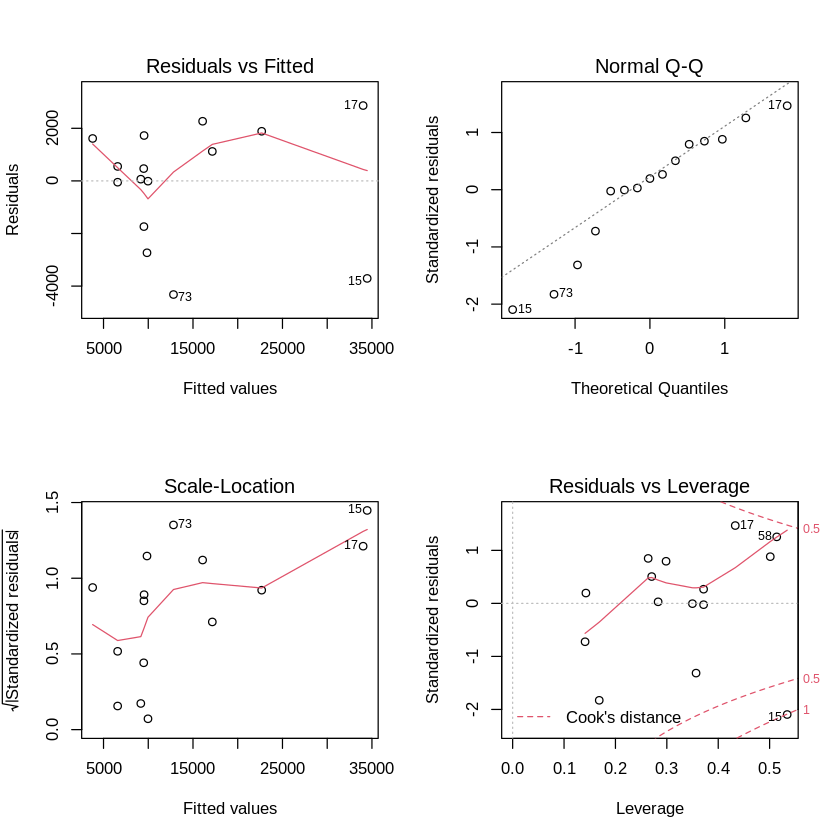

In [ ]:
# c)

par(mfrow=c(2,2))
plot(reg1)

In [ ]:
#d) Atualizações, tirando algumas preditoras

reg1 <- update(reg1, . ~ . - horsepower)
summary(reg1)


Call:
lm(formula = price ~ nlength + engine.size + city.mpg, data = autos)

Residuals:
    Min      1Q  Median      3Q     Max 
-4486.5  -936.7   499.6  1749.0  2988.4 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -10848.05   18721.68  -0.579    0.574    
nlength        -52.84     105.71  -0.500    0.627    
engine.size    260.42      37.85   6.881 2.65e-05 ***
city.mpg        48.18     196.37   0.245    0.811    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2477 on 11 degrees of freedom
  (178 observations deleted due to missingness)
Multiple R-squared:  0.9484,	Adjusted R-squared:  0.9344 
F-statistic: 67.46 on 3 and 11 DF,  p-value: 2.282e-07


In [ ]:
reg1 <- update(reg1, . ~ . - city.mpg)
summary(reg1)


Call:
lm(formula = price ~ nlength + engine.size, data = autos)

Residuals:
    Min      1Q  Median      3Q     Max 
-4512.5  -974.6   403.2  1768.0  3009.6 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7654.71   12921.01  -0.592    0.565    
nlength       -61.60      95.52  -0.645    0.531    
engine.size   256.75      33.39   7.690 5.62e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2378 on 12 degrees of freedom
  (178 observations deleted due to missingness)
Multiple R-squared:  0.9482,	Adjusted R-squared:  0.9395 
F-statistic: 109.7 on 2 and 12 DF,  p-value: 1.94e-08


In [ ]:
reg1 <- update(reg1, . ~ . - nlength)
summary(reg1)


Call:
lm(formula = price ~ engine.size, data = autos)

Residuals:
   Min     1Q Median     3Q    Max 
-11490  -2031   -193   1460  14050 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8862.79     868.66   -10.2   <2e-16 ***
engine.size   172.86       6.45    26.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3717 on 191 degrees of freedom
Multiple R-squared:  0.7899,	Adjusted R-squared:  0.7888 
F-statistic: 718.2 on 1 and 191 DF,  p-value: < 2.2e-16
